In [1]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


c:\Users\Seth Sullivan\anaconda3\envs\aim1\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
EXPERIMENT = "Exp2"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data and Stats

In [3]:
rawdata_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_trial_data_df.pkl") 
data_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_summary_data_df.pkl") 

# ! I was previously loading non-updated data, so pvalues were not coming out for the SD difference
# THis is not used
old_data_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") # NOT UPDATED BY NEW SCRIPTS, KEPT SO I DON'T FORGET


exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 
#! Factor_1 is TRIAL TYPE: React or Guess
#! Factor_2 is CONDITION: Mixed or Only, see data_df if confused
exp2_anova_df["gg_ddof1"] = exp2_anova_df["eps"]*exp2_anova_df["ddof1"]
exp2_anova_df["gg_ddof2"] = exp2_anova_df["eps"]*exp2_anova_df["ddof2"]
exp2_anova_df

,Metric,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps,gg_ddof1,gg_ddof2
0,Reaction_Time_Median,Factor_1,35569.609434,1,23,35569.609434,74.955293,1.077284e-08,1.077284e-08,0.168614,1.0,1.0,23.0
1,Reaction_Time_Median,Factor_2,94932.156785,1,23,94932.156785,81.308564,5.186166e-09,5.186166e-09,0.351190,1.0,1.0,23.0
2,Reaction_Time_Median,Factor_1 * Factor_2,58751.033831,1,23,58751.033831,143.900270,2.225521e-11,2.225521e-11,0.250928,1.0,1.0,23.0
0,Reaction_Time_Mean,Factor_1,40419.357667,1,23,40419.357667,87.111642,2.764028e-09,2.764028e-09,0.183274,1.0,1.0,23.0
1,Reaction_Time_Mean,Factor_2,99322.258008,1,23,99322.258008,97.833097,9.395924e-10,9.395924e-10,0.355429,1.0,1.0,23.0
2,Reaction_Time_Mean,Factor_1 * Factor_2,51306.195598,1,23,51306.195598,118.611506,1.492000e-10,1.492000e-10,0.221695,1.0,1.0,23.0
0,Reaction_Time_SD,Factor_1,23328.991696,1,23,23328.991696,213.844418,3.892540e-13,3.892540e-13,0.544136,1.0,1.0,23.0
1,Reaction_Time_SD,Factor_2,8931.312218,1,23,8931.312218,53.037566,2.067139e-07,2.067139e-07,0.313646,1.0,1.0,23.0
2,Reaction_Time_SD,Factor_1 * Factor_2,1102.098251,1,23,1102.098251,6.551923,1.751788e-02,1.751788e-02,0.053379,1.0,1.0,23.0
0,Reaction_Time_IQR,Factor_1,33414.153931,1,23,33414.153931,94.810609,1.260798e-09,1.260798e-09,0.362133,1.0,1.0,23.0


In [4]:
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.024174,0.0,0.027363
1,Reaction_Time_Mean,NaN,0.0,0.004936,0.0,0.354558
2,Reaction_Time_SD,NaN,0.0,0.000011,0.0,0.000000
3,Reaction_Time_IQR,NaN,0.0,0.000015,0.0,0.000002


## Check who is over 650

In [5]:
rawdata_df[(rawdata_df["reaction_time"]>650)].groupby(["subject","condition","decision_type"]).count()

decision_array  reaction_time  movement_time
subject condition  decision_type                                              
1       mixed      guess                       2              2              2
2       mixed      guess                       6              6              6
3       mixed      guess                       5              5              5
4       mixed      guess                      14             14             14
5       mixed      guess                       1              1              1
6       guess_only guess                       1              1              1
        mixed      guess                       6              6              6
7       mixed      guess                      16             16             16
8       guess_only guess                       6              6              6
        mixed      guess                      23             23             23
9       mixed      guess                       2              2              2
10      guess_only guess                       1              1              1
11      guess_only guess                       1              1              1
        mixed      guess                       8              8              8
12      guess_only guess                       1              1              1
        mixed      guess                       4              4              4
13      mixed      guess                       4              4              4
14      mixed      guess                       5              5              5
15      mixed      guess                       4              4              4
16      mixed      guess                       2              2              2
17      guess_only guess                       4              4              4
        mixed      guess                      14             14             14
18      mixed      guess                       4              4              4
19      mixed      guess                       5              5              5
20      mixed      guess                       3              3              3
21      mixed      guess                       1              1              1
22      mixed      guess                      12             12             12
23      guess_only guess                       4              4              4
        mixed      guess                      25             25             25
24      guess_only guess                       4              4              4
        mixed      guess                      37             37             37
        react_only react                       1              1              1

Number of trials less than 150 or greater than 650

In [6]:
rawdata_df[(rawdata_df["reaction_time"]>650) | (rawdata_df["reaction_time"] <150)].groupby(["subject","condition","decision_type"]).count()['reaction_time'].sum()

264

## Check who is under 150

In [7]:
rawdata_df[rawdata_df["reaction_time"]<150].groupby(["subject","condition","decision_type"]).count()

decision_array  reaction_time  movement_time
subject condition  decision_type                                              
1       guess_only guess                       1              1              1
3       guess_only guess                       3              3              3
        mixed      guess                       3              3              3
                   react                       2              2              2
5       guess_only guess                       1              1              1
6       mixed      react                       2              2              2
9       guess_only guess                       2              2              2
        mixed      react                       1              1              1
11      mixed      guess                       1              1              1
12      guess_only guess                       4              4              4
14      mixed      react                       1              1              1
        react_only react                       3              3              3
16      guess_only guess                       3              3              3
18      guess_only guess                       1              1              1
        mixed      guess                       1              1              1
20      mixed      react                       1              1              1
21      guess_only guess                       1              1              1
        mixed      guess                       1              1              1
                   react                       1              1              1
        react_only react                       1              1              1
23      guess_only guess                       1              1              1
        mixed      guess                       1              1              1
24      guess_only guess                       1              1              1
        react_only react                       1              1              1

# Plotting Constants

In [8]:
collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]

# Figures

## Experimental Design

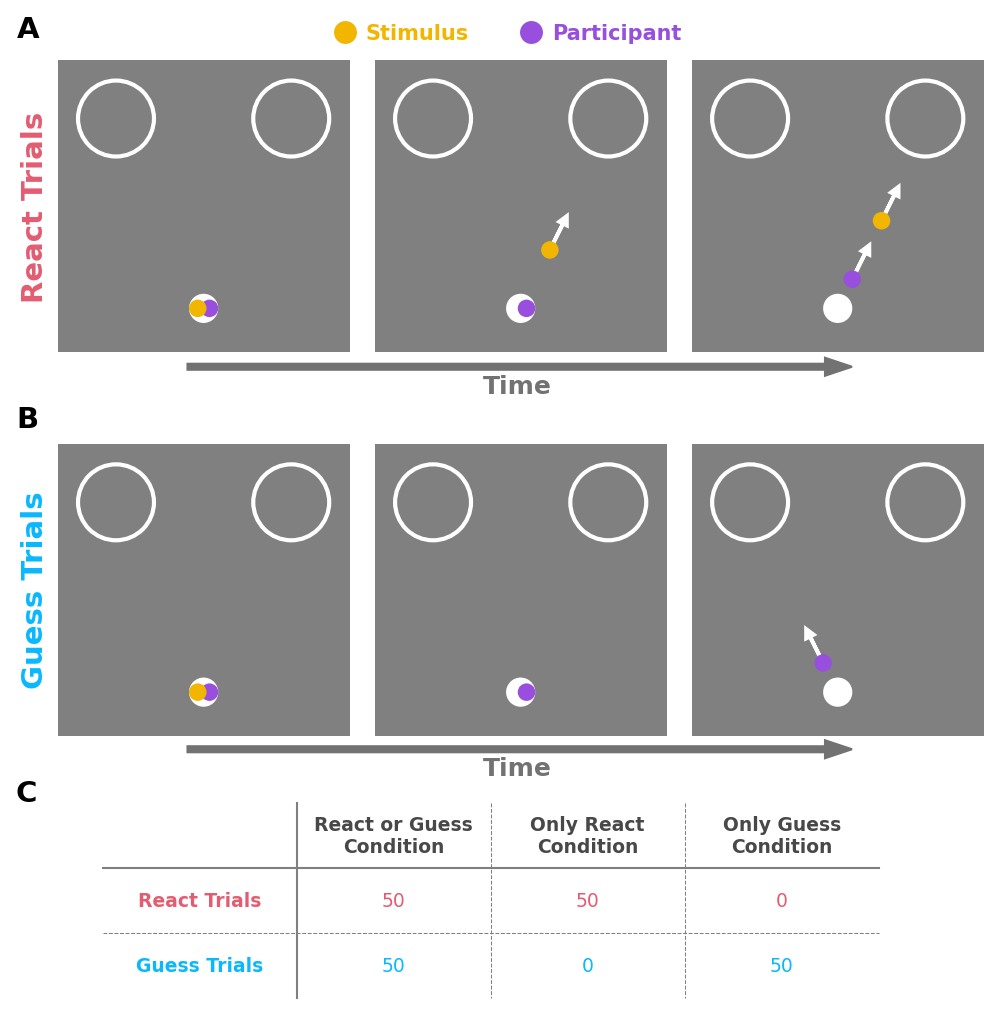

In [9]:
#* Create Shape Objects
squares = [(0,0,1,1)]*6
circle_radius = 0.13
circ_pad = 0.07
startx,starty = 0.5, 0.15
agent_circle_positions =[(startx-0.02,starty),
                         (startx+0.1,starty+0.2),
                         (startx+0.15,starty+0.3),
                         (startx-0.02,starty),
                         (0,0),
                         (0,0)]
player_circle_positions =  [(startx+0.02,starty),
                            (startx+0.02,starty),
                            (startx+0.05,starty+0.1),
                            (startx+0.02,starty),
                            (startx+0.02,starty),
                            (startx-0.05,starty+0.1)]
rectangles = []
circle_patches = []
start_circles = []
agent_circles = []
player_circles = []
for i,square in enumerate(squares):
    rectangles.append(mpl.patches.Rectangle((square[0], square[1]), square[2], square[3], edgecolor='grey', facecolor='grey', lw=0,clip_on=False))
    circLx = square[0] + circle_radius + circ_pad
    circRx = square[0] + square[2] - circle_radius - circ_pad
    circy = square[1] + square[3] - circle_radius - circ_pad
    circL = mpl.patches.Circle((circLx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circR = mpl.patches.Circle((circRx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circle_patches.append((circL,circR))
    start_circles.append(mpl.patches.Circle((startx,starty), 0.05, edgecolor='white', facecolor='white', lw=0))
    agent_circles.append(mpl.patches.Circle(agent_circle_positions[i], 0.03, facecolor=constants.stimulus_color, lw=0))
    player_circles.append(mpl.patches.Circle(player_circle_positions[i], 0.03, facecolor=constants.player_color, lw=0))
    
#* Initialize Plot
mosaic = [["a","aa","aaa"],
          ["b","bb","bbb"],
          ["c","c","c"],
]
fig = pf.NewFigure(mosaic, figsize=(6.5,6.5), height_ratios=[1,1,0.525])
square_axes = [ax for k,ax in fig.axes.items() if k !='c' ]
#* Plot upper and lower squares and associated circles
for i,ax in enumerate(square_axes):
    ax.set_aspect('equal')
    ax.add_patch(rectangles[i])
    ax.add_patch(circle_patches[i][0])
    ax.add_patch(circle_patches[i][1])
    ax.add_patch(start_circles[i])
    if i == 1:
        ax.arrow(agent_circle_positions[i][0],agent_circle_positions[i][1],0.045,0.09, lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
    elif i == 2:
        ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],0.045,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
        ax.arrow(agent_circle_positions[i][0],agent_circle_positions[i][1],0.045,0.09, lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
    elif i == 5:
        ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],-0.045,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
    
    ax.add_patch(player_circles[i])
    ax.add_patch(agent_circles[i]) if i not in [4,5] else None
        
    ax.set_xlim(0,1) # need to do this because ax arrow fucks with the xlim and ylim
    ax.set_ylim(0,1)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.yaxis.set_tick_params(labelbottom=False)
    ax.set_yticks([])
    ax.spines[['left', 'bottom']].set_visible(False)  

fig.axes['a'].set_ylabel("React Trials", fontsize=14,fontweight="bold", color=wheel.rak_red)
fig.axes['b'].set_ylabel("Guess Trials", fontsize=14,fontweight="bold", color=wheel.rak_blue)

#*### Plot Table ######
# Old table
if False:
    fig.axes['c'].set_xticklabels([])
    fig.axes['c'].set_yticklabels([])
    table = np.array([
        ["Condition","React\nTrials","Guess\nTrials"],
        ["React or\n Guess", "50", "50"],
        ["React", "50", "0"],
        ["Guess", "0", "50"],
    ])
    fontcolors = np.full_like(table, wheel.black)
    fontcolors[1:,0] = wheel.black
    fontcolors[1,1] = wheel.rak_red
    fontcolors[2,1] = wheel.dark_red
    fontcolors[1,2] = wheel.rak_blue
    fontcolors[3,2] = wheel.dark_blue

    fontweights = np.full_like(table, "bold")
    fontweights[1:,0] = "light"

    inner_horizontal_ls = ["-","--","--"]
    inner_vertical_ls = ["--","--","--"]


    pf.PrettyTable(fig.axes['c'], table_values=table, fontcolor=fontcolors, fontweight=fontweights,
                inner_horizontal_ls=inner_horizontal_ls,inner_vertical_ls=inner_vertical_ls, 
                inner_lw = 0.5, border_lw=2, fontsize=8, ha='center')
# New Explicit Table
if True:
    fig.axes['c'].set_xticklabels([])
    fig.axes['c'].set_yticklabels([])
    table = np.array([
        ["","React Trials","Guess Trials"],
        ["React or Guess\nCondition", "50", "50"],
        ["Only React\nCondition", "50", "0"],
        ["Only Guess\nCondition", "0", "50"],
    ]).T
    fontcolors = np.full_like(table, wheel.dark_grey)
    # fontcolors[0,1] = wheel.blend_colors(wheel.rak_red, wheel.dark_red)
    # fontcolors[0,2] = wheel.blend_colors(wheel.rak_blue, wheel.dark_blue)
    fontcolors[0,:] = wheel.lighten_color(wheel.dark_grey, 1.3) 
    fontcolors[1,:] = wheel.rak_red
    fontcolors[2,:] = wheel.rak_blue

    fontweights = np.full_like(table, "bold")
    fontweights[1:,1:] = "light"

    inner_horizontal_ls = ["-","--","--"]
    inner_vertical_ls = ["-","--","--"]
    inner_horizontal_lw = [1,0.5,0.5]
    inner_vertical_lw = [1,0.5,0.5]

    pf.PrettyTable(fig.axes['c'], table_values=table, fontcolor=fontcolors, fontweight=fontweights,
                inner_horizontal_ls=inner_horizontal_ls,inner_vertical_ls=inner_vertical_ls, 
                inner_horizontal_lw = inner_horizontal_lw, inner_vertical_lw=inner_vertical_lw, 
                border_lw=0, fontsize=9, ha='center', 
                bold_first_row=True)
fig.axes['c'].set_axis_off()

#*####### Fine tuning and add time arrows ########
# fig.fig.canvas.draw()
# fig.fig.set_layout_engine('none')
if False:
    adj = 2
    fig.adjust_size(fig.axes['c'],(0,-adj))
    fig.adjust_position(fig.axes['c'],(0,adj/2))

    fig.adjust_position(fig.axes['a'], (0.1,0))
    fig.adjust_position(fig.axes['aa'], (0.1,0))
    fig.adjust_position(fig.axes['b'], (0.1,0))
    
fig.adjust_size(fig.axes['c'], (-1,0))
fig.adjust_position(fig.axes['c'], (0.3 ,-0.1))

#* Plot Time Arrows
for ypos in [4.15,1.6]:
    fig.axmain.text(3.35, ypos-0.13, "Time", ha='center',va='center', 
                    transform=fig.axmain.transData, fontweight="bold", color=wheel.dark_grey)
    fig.axmain.arrow(1.15, ypos, 4.25, 0, transform = fig.axmain.transData, color=wheel.dark_grey, width=0.04)

#* Legend
dv.legend(ax=fig.axmain, labels=["Stimulus", "Participant"], 
        colors=[constants.stimulus_color, constants.player_color ],
        handlestyle="circle", fontsize=10, loc="center", bbox_to_anchor=(0.5,0.98),
        markersize=10, handletextpad=0, columnspacing=2,
        ncol=2)
fig.add_letter(fig.axmain,0.0015,0.999,transform=fig.axmain.transAxes, fontsize=14)
fig.add_letter(fig.axmain, 0.0015, 0.599, transform = fig.axmain.transAxes, fontsize=14)
fig.add_letter(fig.axmain,0.0015,1.4,transform=fig.axmain.transData, fontsize=14)
# fig.remove_figure_borders()
fig.savefig(SAVE_PATH / "exp2_design.png")
plt.show()

## Median and IQR Reaction Time

In [10]:
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.024174,0.0,0.027363
1,Reaction_Time_Mean,NaN,0.0,0.004936,0.0,0.354558
2,Reaction_Time_SD,NaN,0.0,0.000011,0.0,0.000000
3,Reaction_Time_IQR,NaN,0.0,0.000015,0.0,0.000002


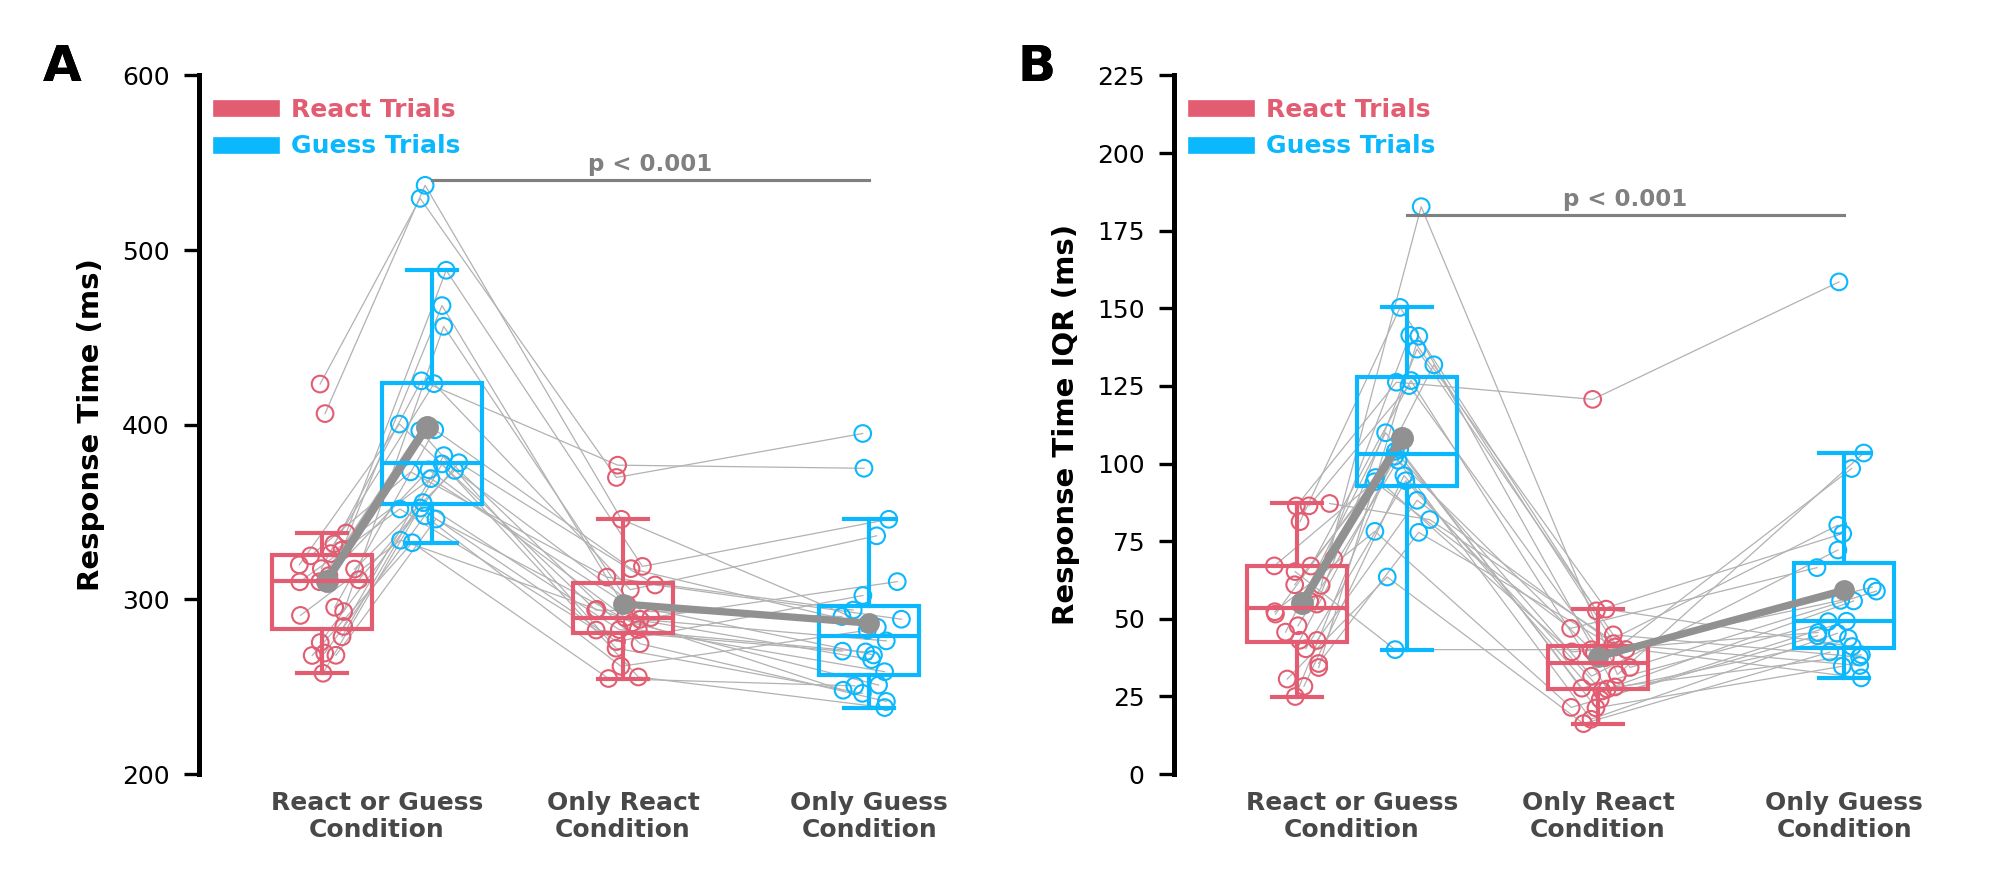

In [11]:
metric_names = ['Reaction_Time_Median',"Reaction_Time_IQR"]
legend_fontsize = 6
ticklabel_fontsize = 6
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition',
         'Only React\nCondition',
         'Only Guess\nCondition']
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.rak_red, wheel.rak_blue]
# combos = ['01','02','13','23',]
combos = ['13']

ylims = [(200,600), (0,225)]
xlocs = np.arange(0,3,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1,25 )]
ylabels = ["Response Time (ms)", 
           "Response Time IQR (ms)"
           ]
w,h = 6.5,2.75
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.25*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [540, 180]
shift = np.array([[-35,-35,-35,-35],[-20]*4])
h=[2.5,1.5]

for i,ax in enumerate([ax1,ax2]):
    np.random.seed(17)

    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    dv.boxplot(metric[:,0],
                x_pos = xlocs[0] - 0.55*bw ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[0])
    dv.boxplot(metric[:,1],
                x_pos = xlocs[0] + 0.55*bw ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[1])
            
    dv.boxplot(metric[:,2],
            x_pos = xlocs[1],
            ax=ax,box_width = bw,
            box_lw=box_lw, linewidth=box_lw, 
            whisker_lw=box_lw, color = colors[2]) 
    dv.boxplot(metric[:,3],
                x_pos = xlocs[2],
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[3])
            
        
    dv.jitter_array(ax =ax, 
                    x_positions = [xlocs[0]-0.5*bw,xlocs[0]+0.5*bw,xlocs[1],xlocs[2]],
                    data = metric.T,
                    circle_size = 16,
                    include_mean=False,
                    data_color = colors, 
                    data_edge_color = wheel.light_grey, 
                    circle_lw=0.5, 
                    noise_scale=0.06,
                    alpha=0.2)
    # Plot thick mean lines between react and guesses only
    means = np.mean(metric,axis=0)
    ax.plot([xlocs[0]-0.5*bw, xlocs[0]+0.5*bw], (means[0],means[1]), c=wheel.grey, marker='o',ms=4.5, lw=2)
    ax.plot([xlocs[1], xlocs[2]], (means[2],means[3]), c=wheel.grey, marker='o',ms=4, lw=1.75)
    
    
    dv.legend(ax, labels=["React Trials", "Guess Trials"], colors=[wheel.rak_red, wheel.rak_blue], fontsize=6, loc="upper left")
    stat_xlocs = [xlocs[0]-0.55*bw, xlocs[0]+0.55*bw, xlocs[1],xlocs[2]]
    for j,c in enumerate(combos):
        a = int(c[0])
        b = int(c[1])
        dv.stat_annotation(ax, stat_xlocs[a], stat_xlocs[b],
                            statline_y[i],
                            p_val=pvals[c],
                            cles=None,
                            fontsize=5.5,
                            h=h[i], 
                            lw=0.75, 
                            stacked=True)
        statline_y[i] += shift[i,j]

    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    ax.set_yticks(ylocs[i])
    ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize,color=wheel.lighten_color(wheel.dark_grey, 1.3) )
    ax.tick_params(axis='x', which='major', pad=0.5)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.45)

# plt.show()
fig.savefig(SAVE_PATH / "exp2_reaction_panel_median_iqr.png")

## Reaction Time Mean and SD

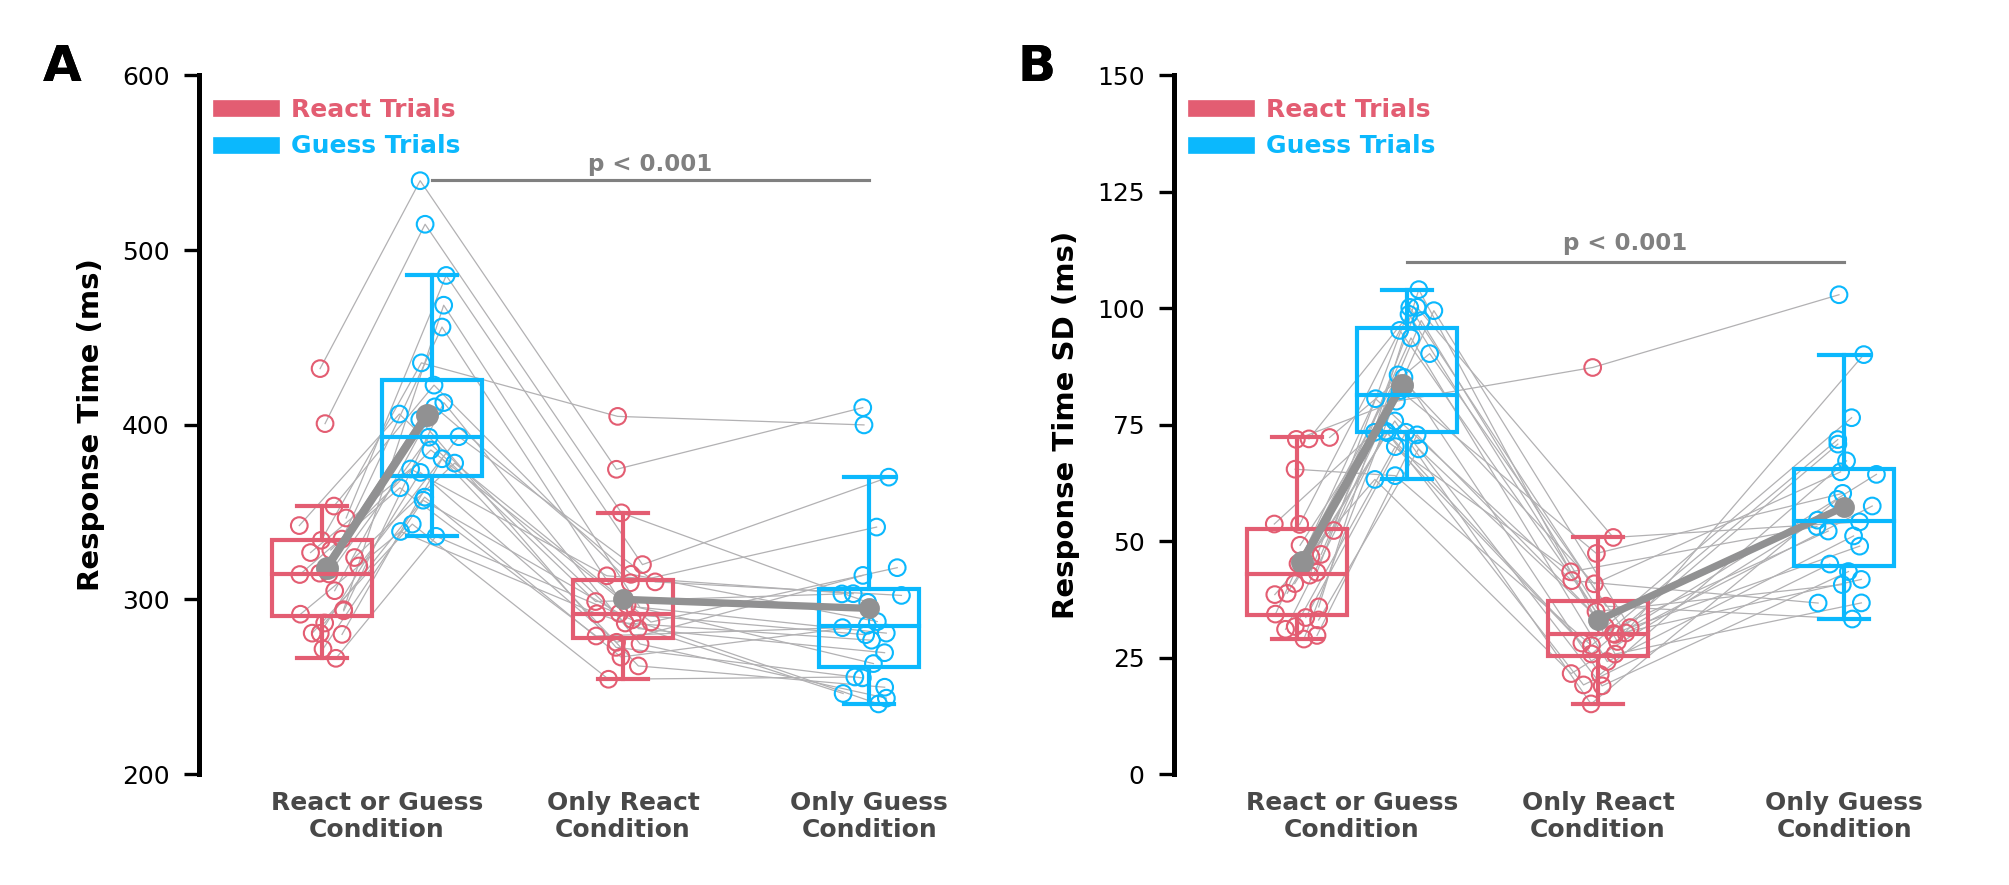

In [12]:
metric_names = ['Reaction_Time_Mean',"Reaction_Time_SD"]
legend_fontsize = 6
ticklabel_fontsize = 6
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition',
         'Only React\nCondition',
         'Only Guess\nCondition']
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.rak_red, wheel.rak_blue]
# combos = ['01','02','13','23',]
combos = ['13']

ylims = [(200,600), (0,150)]
xlocs = np.arange(0,3,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1, 25)]
ylabels = ["Response Time (ms)", 
           "Response Time SD (ms)"
           ]
w,h = 6.5,2.75
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.25*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [540, 110]
shift = np.array([[-35,-35,-35,-35],[-20]*4])
h=[2.5,1.5]

for i,ax in enumerate([ax1,ax2]):
    np.random.seed(17)

    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    dv.boxplot(metric[:,0],
                x_pos = xlocs[0] - 0.55*bw ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[0])
    dv.boxplot(metric[:,1],
                x_pos = xlocs[0] + 0.55*bw ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[1])
            
    dv.boxplot(metric[:,2],
            x_pos = xlocs[1],
            ax=ax,box_width = bw,
            box_lw=box_lw, linewidth=box_lw, 
            whisker_lw=box_lw, color = colors[2]) 
    dv.boxplot(metric[:,3],
                x_pos = xlocs[2],
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[3])
            
        
    dv.jitter_array(ax =ax, 
                    x_positions = [xlocs[0]-0.5*bw,xlocs[0]+0.5*bw,xlocs[1],xlocs[2]],
                    data = metric.T,
                    circle_size = 16,
                    include_mean=False,
                    data_color = colors, 
                    data_edge_color = wheel.light_grey, 
                    circle_lw=0.5, 
                    noise_scale=0.06,
                    alpha=0.2)
    # Plot thick mean lines between react and guesses only
    means = np.mean(metric,axis=0)
    ax.plot([xlocs[0]-0.5*bw, xlocs[0]+0.5*bw], (means[0],means[1]), c=wheel.grey, marker='o',ms=4.5, lw=2)
    ax.plot([xlocs[1], xlocs[2]], (means[2],means[3]), c=wheel.grey, marker='o',ms=4, lw=1.75)
    
    
    dv.legend(ax, labels=["React Trials", "Guess Trials"], colors=[wheel.rak_red, wheel.rak_blue], fontsize=6, loc="upper left")
    stat_xlocs = [xlocs[0]-0.55*bw, xlocs[0]+0.55*bw, xlocs[1],xlocs[2]]
    for j,c in enumerate(combos):
        a = int(c[0])
        b = int(c[1])
        dv.stat_annotation(ax, stat_xlocs[a], stat_xlocs[b],
                            statline_y[i],
                            p_val=pvals[c],
                            cles=None,
                            fontsize=5.5,
                            h=h[i], 
                            lw=0.75, 
                            stacked=True)
        statline_y[i] += shift[i,j]

    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    ax.set_yticks(ylocs[i])
    ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize,color=wheel.lighten_color(wheel.dark_grey, 1.3) )
    ax.tick_params(axis='x', which='major', pad=0.5)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.45)

# plt.show()
fig.savefig(SAVE_PATH / "exp2_reaction_panel_mean_sd.png")

## Mean/SD React Trials and Guess Trials Difference

In [13]:
import analysis_utilities as au

react_mixed_reaction_time_median = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_Median"].to_numpy()
guess_mixed_reaction_time_median = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_Median"].to_numpy()
react_only_reaction_time_median = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Only")]["Reaction_Time_Median"].to_numpy()
guess_only_reaction_time_median = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Only")]["Reaction_Time_Median"].to_numpy()

mixed_diff_median = guess_mixed_reaction_time_median - react_mixed_reaction_time_median
only_diff_median  = guess_only_reaction_time_median - react_only_reaction_time_median
print(f"pval for medians: {au.bootstrap(mixed_diff_median, only_diff_median, M=1e6, paired=True)}")

react_mixed_reaction_time_mean = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_Mean"].to_numpy()
guess_mixed_reaction_time_mean = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_Mean"].to_numpy()
react_only_reaction_time_mean  = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Only")]["Reaction_Time_Mean"].to_numpy()
guess_only_reaction_time_mean  = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Only")]["Reaction_Time_Mean"].to_numpy()

mixed_diff_mean = guess_mixed_reaction_time_mean - react_mixed_reaction_time_mean
only_diff_mean  = guess_only_reaction_time_mean - react_only_reaction_time_mean
print(f"pval for means: {au.bootstrap(mixed_diff_mean, only_diff_mean, M=1e6, paired=True)}")
print(f"cles for means: {au.cles(mixed_diff_mean, only_diff_mean, paired=True)}")

react_mixed_reaction_time_iqr = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_IQR"].to_numpy()
guess_mixed_reaction_time_iqr = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_IQR"].to_numpy()
react_only_reaction_time_iqr  = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Only")]["Reaction_Time_IQR"].to_numpy()
guess_only_reaction_time_iqr  = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Only")]["Reaction_Time_IQR"].to_numpy()

mixed_diff_iqr = guess_mixed_reaction_time_iqr - react_mixed_reaction_time_iqr
only_diff_iqr  = guess_only_reaction_time_iqr - react_only_reaction_time_iqr
print(f"pval for IQR: {au.bootstrap(mixed_diff_iqr, only_diff_iqr, M=1e6, paired=True)}")


react_mixed_reaction_time_sd = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_SD"].to_numpy()
guess_mixed_reaction_time_sd = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Mixed")]["Reaction_Time_SD"].to_numpy()
react_only_reaction_time_sd  = data_df[(data_df["Factor_1"]=="React") & (data_df["Factor_2"]=="Only")]["Reaction_Time_SD"].to_numpy()
guess_only_reaction_time_sd  = data_df[(data_df["Factor_1"]=="Guess") & (data_df["Factor_2"]=="Only")]["Reaction_Time_SD"].to_numpy()

mixed_diff_sd = guess_mixed_reaction_time_sd- react_mixed_reaction_time_sd
only_diff_sd  = guess_only_reaction_time_sd - react_only_reaction_time_sd
print(f"pval for sd: {au.bootstrap(mixed_diff_sd, only_diff_sd, M=1e6, paired=True)}")
print(f"cles for sd: {au.cles(mixed_diff_sd, only_diff_sd, paired=True)}")

pval for medians: 0.0
pval for means: 0.0
cles for means: 100.0
pval for IQR: 3.4e-05
pval for sd: 0.008987
cles for sd: 66.66666666666666


### Mean and SD

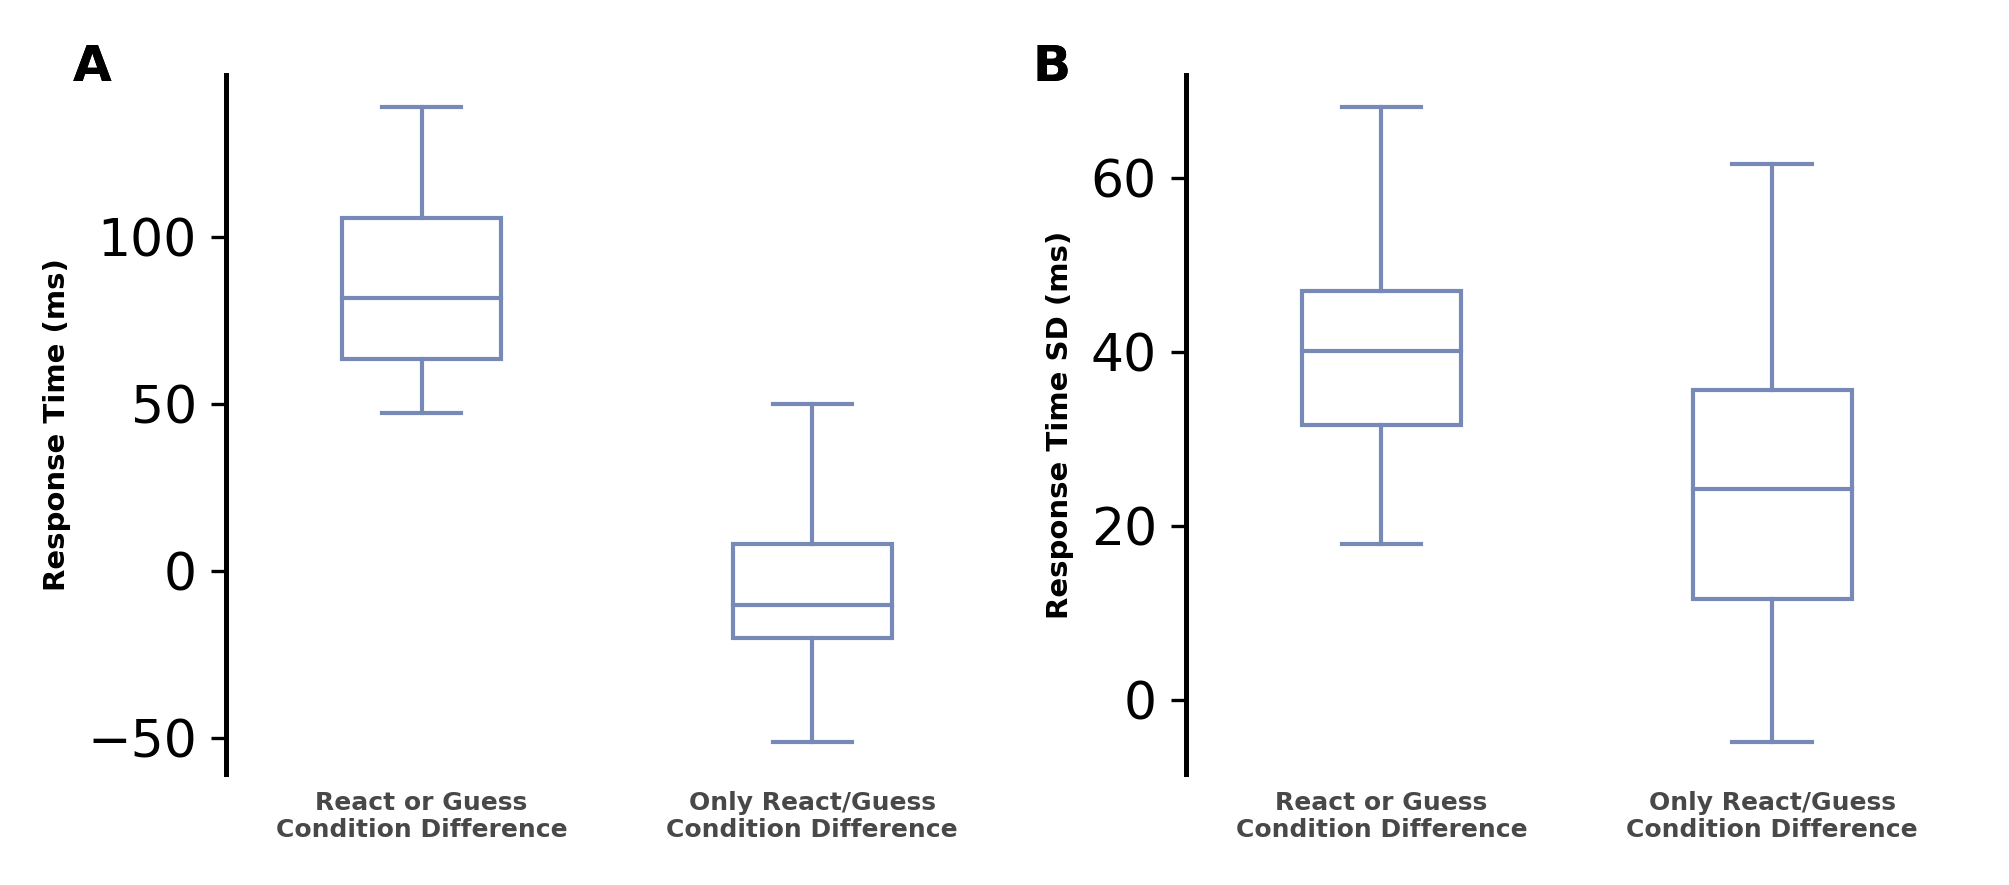

In [14]:
metrics = [[mixed_diff_mean, only_diff_mean], 
           [mixed_diff_sd, only_diff_sd]
]
metric_names = ['Reaction_Time_Mean',"Reaction_Time_SD"]
legend_fontsize = 6
ticklabel_fontsize = 6
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition Difference',
         'Only React/Guess\nCondition Difference',
]
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.rak_red, wheel.rak_blue]
# combos = ['01','02','13','23',]
combos = ['13']

ylims = [(200,600), (0,150)]
xlocs = np.arange(0,2,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1,25 )]
ylabels = ["Response Time (ms)", 
           "Response Time SD (ms)"
           ]
w,h = 6.5,2.75
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.25*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [540, 180]
shift = np.array([[-35,-35,-35,-35],[-20]*4])
h=[2.5,1.5]

for i,ax in enumerate([ax1,ax2]):
    np.random.seed(17)

    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    dv.boxplot(metrics[i][0],
                x_pos = xlocs[0],
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = wheel.blend_colors(colors[0],colors[1])
    )
    dv.boxplot(metrics[i][1],
                x_pos = xlocs[1] ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = wheel.blend_colors(colors[0],colors[1]))
            
    # dv.jitter_array(ax =ax, 
    #                 x_positions = [xlocs[0]-0.5*bw,xlocs[0]+0.5*bw,xlocs[1],xlocs[2]],
    #                 data = metrics.T,
    #                 circle_size = 16,
    #                 include_mean=False,
    #                 data_color = colors, 
    #                 data_edge_color = wheel.light_grey, 
    #                 circle_lw=0.5, 
    #                 noise_scale=0.06,
    #                 alpha=0.2)
    
    
    # dv.legend(ax, labels=["React Trials", "Guess Trials"], colors=[wheel.rak_red, wheel.rak_blue], fontsize=6, loc="upper left")
    # stat_xlocs = [xlocs[0]-0.55*bw, xlocs[0]+0.55*bw, xlocs[1],xlocs[2]]
    # for j,c in enumerate(combos):
    #     a = int(c[0])
    #     b = int(c[1])
    #     dv.stat_annotation(ax, stat_xlocs[a], stat_xlocs[b],
    #                         statline_y[i],
    #                         p_val=pvals[c],
    #                         cles=None,
    #                         fontsize=5.5,
    #                         h=h[i], 
    #                         lw=0.75, 
    #                         stacked=True)
    #     statline_y[i] += shift[i,j]

    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    # ax.set_yticks(ylocs[i])
    # ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize,color=wheel.lighten_color(wheel.dark_grey, 1.3) )
    ax.tick_params(axis='x', which='major', pad=0.5)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    # ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.45)

# plt.show()
fig.savefig(SAVE_PATH / "exp2_react_guess_difference_mean_sd.png")

### Median and IQR

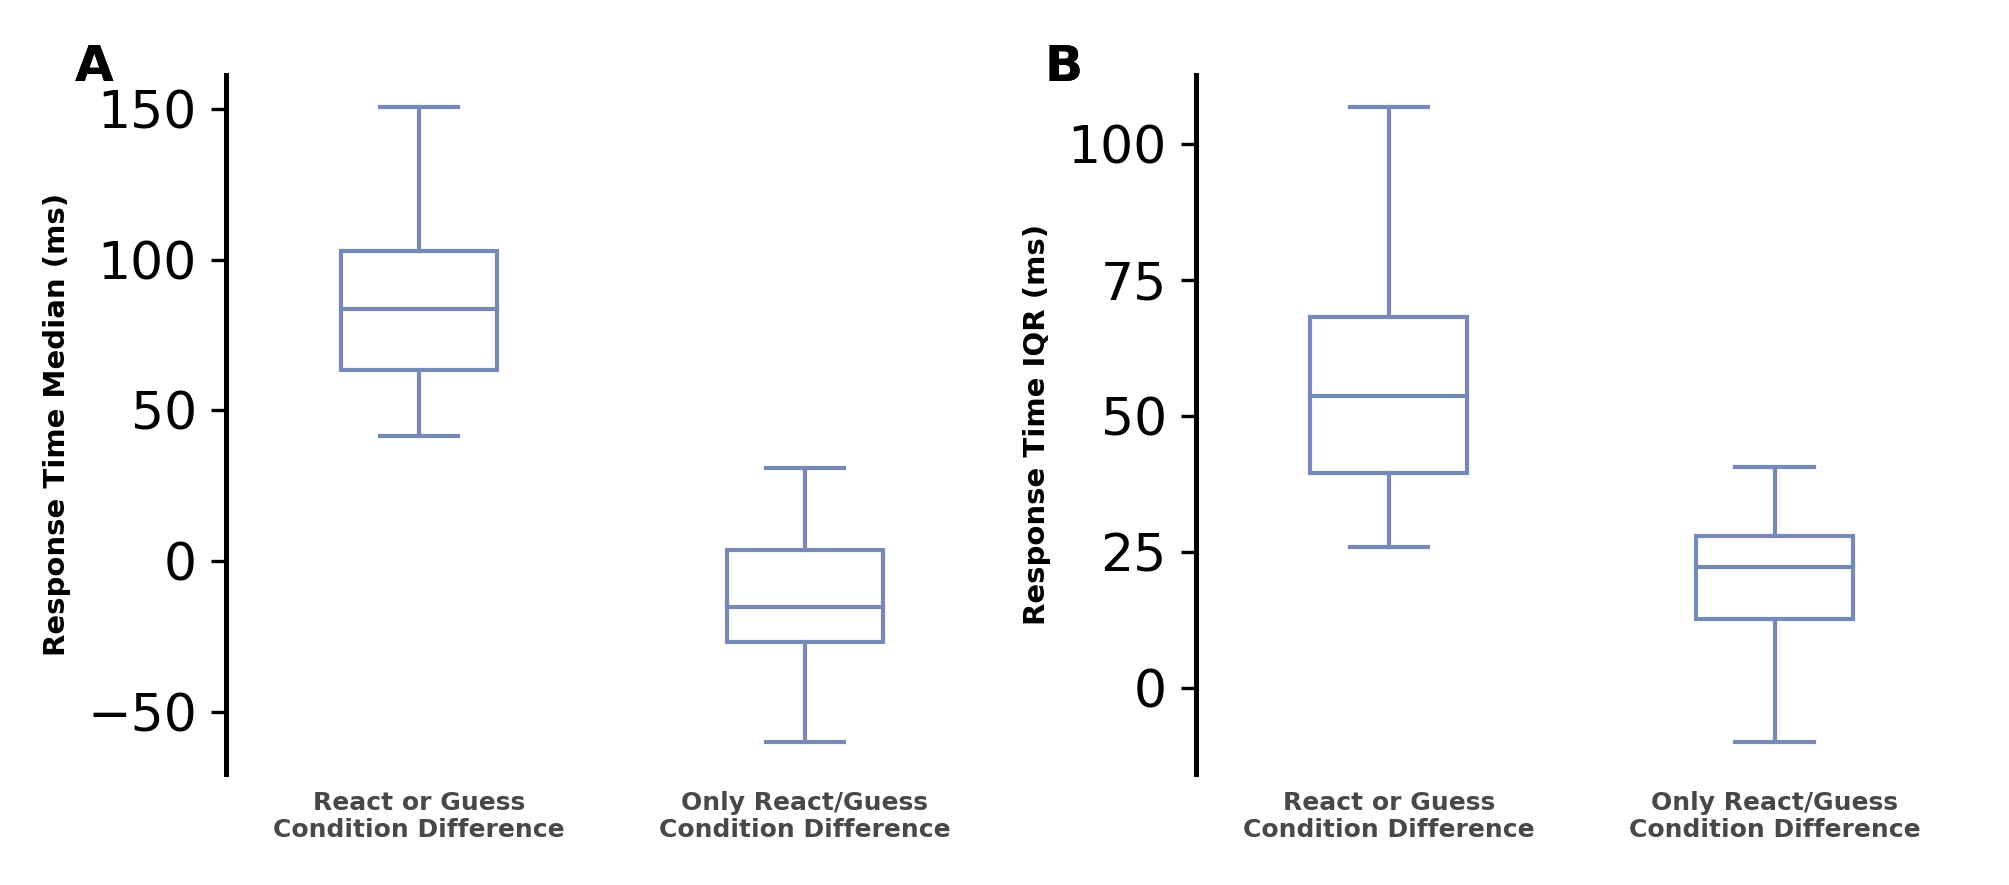

In [15]:
metrics = [[mixed_diff_median, only_diff_median], 
           [mixed_diff_iqr, only_diff_iqr]
]
metric_names = ['Reaction_Time_Median',"Reaction_Time_IQR"]
legend_fontsize = 6
ticklabel_fontsize = 6
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition Difference',
         'Only React/Guess\nCondition Difference',
]
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.rak_red, wheel.rak_blue]
# combos = ['01','02','13','23',]
combos = ['13']

ylims = [(200,600), (0,150)]
xlocs = np.arange(0,2,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1,25 )]
ylabels = ["Response Time Median (ms)", 
           "Response Time IQR (ms)"
           ]
w,h = 6.5,2.75
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.25*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [540, 180]
shift = np.array([[-35,-35,-35,-35],[-20]*4])
h=[2.5,1.5]

for i,ax in enumerate([ax1,ax2]):
    np.random.seed(17)

    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    dv.boxplot(metrics[i][0],
                x_pos = xlocs[0],
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = wheel.blend_colors(colors[0],colors[1])
    )
    dv.boxplot(metrics[i][1],
                x_pos = xlocs[1] ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = wheel.blend_colors(colors[0],colors[1])
    )            
    # dv.jitter_array(ax =ax, 
    #                 x_positions = [xlocs[0]-0.5*bw,xlocs[0]+0.5*bw,xlocs[1],xlocs[2]],
    #                 data = metrics.T,
    #                 circle_size = 16,
    #                 include_mean=False,
    #                 data_color = colors, 
    #                 data_edge_color = wheel.light_grey, 
    #                 circle_lw=0.5, 
    #                 noise_scale=0.06,
    #                 alpha=0.2)
    
    
    # dv.legend(ax, labels=["React Trials", "Guess Trials"], colors=[wheel.rak_red, wheel.rak_blue], fontsize=6, loc="upper left")
    # stat_xlocs = [xlocs[0]-0.55*bw, xlocs[0]+0.55*bw, xlocs[1],xlocs[2]]
    # for j,c in enumerate(combos):
    #     a = int(c[0])
    #     b = int(c[1])
    #     dv.stat_annotation(ax, stat_xlocs[a], stat_xlocs[b],
    #                         statline_y[i],
    #                         p_val=pvals[c],
    #                         cles=None,
    #                         fontsize=5.5,
    #                         h=h[i], 
    #                         lw=0.75, 
    #                         stacked=True)
    #     statline_y[i] += shift[i,j]

    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    # ax.set_yticks(ylocs[i])
    # ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize,color=wheel.lighten_color(wheel.dark_grey, 1.3) )
    ax.tick_params(axis='x', which='major', pad=0.5)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    # ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.45)

# plt.show()
fig.savefig(SAVE_PATH / "exp2_react_guess_difference_median_iqr.png")

## Alternate exp2 result figure

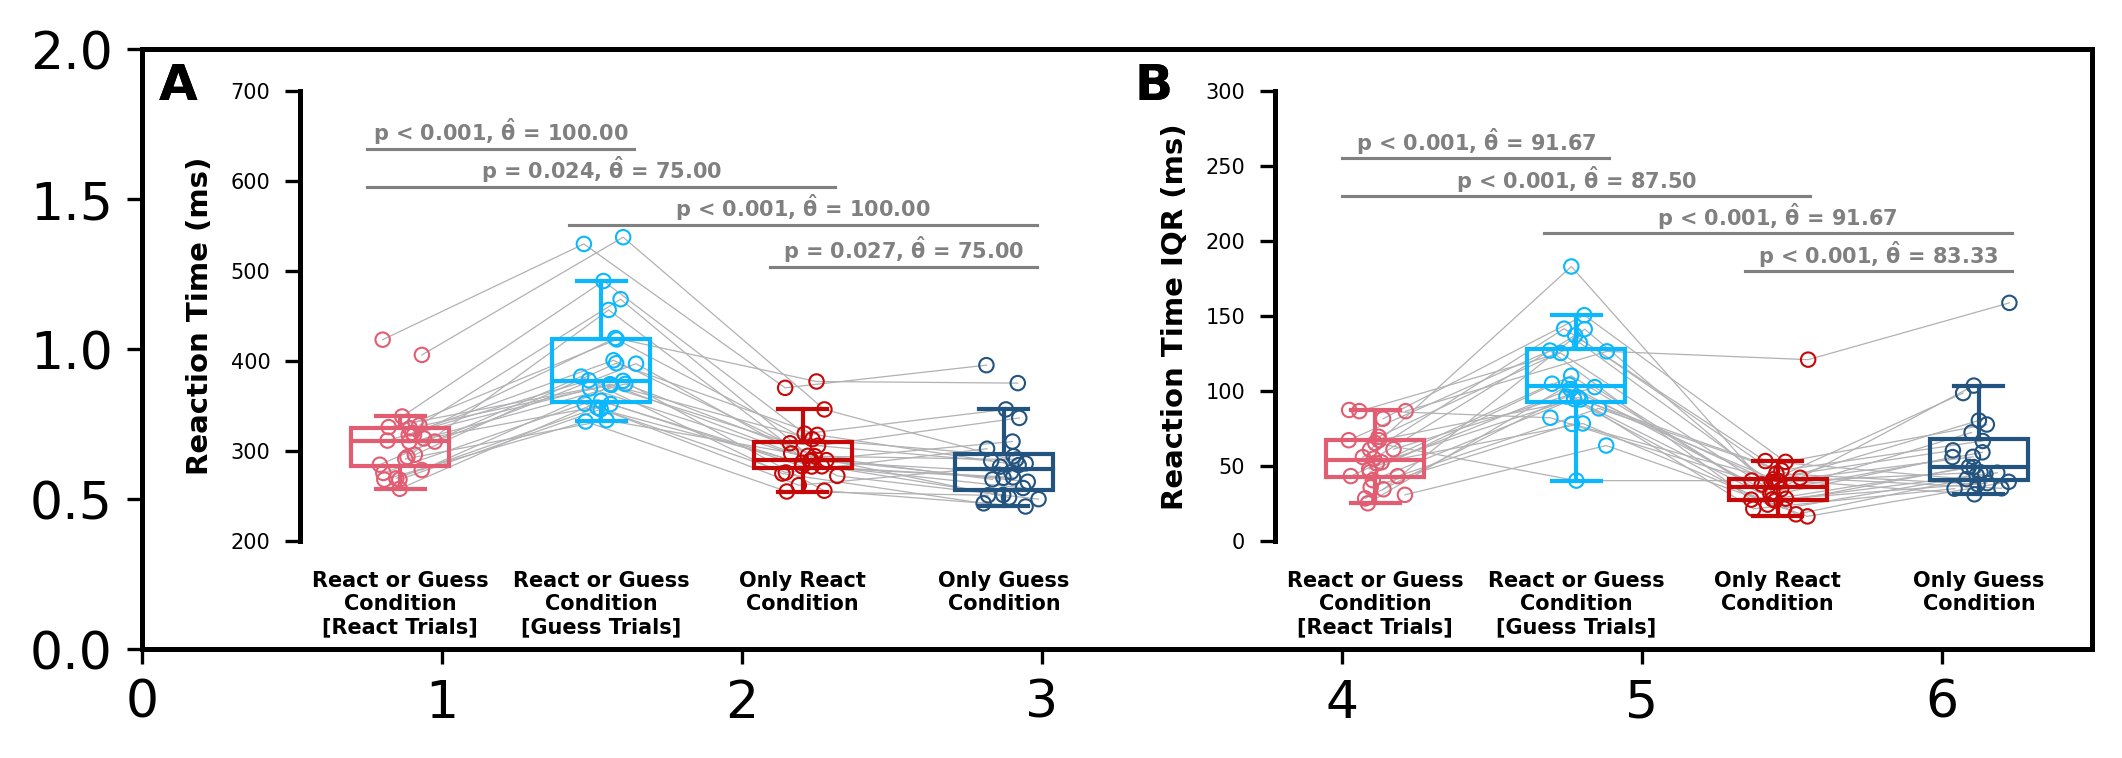

In [16]:
metric_names = ['Reaction_Time_Median',"Reaction_Time_IQR"]
legend_fontsize = 5
ticklabel_fontsize = 5
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition\n[React Trials]','React or Guess\nCondition\n[Guess Trials]',
         'Only React\nCondition','Only Guess\nCondition']
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.dark_red, wheel.dark_blue]
combos = ['01','02','13','23',]

ylims = [(200,700), (0,300)]
xlocs = np.arange(0,4,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1,50)]
ylabels = ["Reaction Time (ms)", 
           "Reaction Time IQR (ms)"
           ]
w,h = 6.5,2
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.3*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [635,255]
shift = np.array([[-42,-42,-47,-42],[-25]*4])
h=[3,1]
np.random.seed(13)
for i,ax in enumerate([ax1,ax2]):
    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    for j in range(4):
        dv.boxplot(metric[:,j],
                   x_pos = xlocs[j],
                   ax=ax,box_width = bw,
                   box_lw=box_lw, linewidth=box_lw, 
                   whisker_lw=box_lw, color = colors[j],
                   include_mean=True)
        
        
    for j,c in enumerate(combos):
        a = int(c[0])
        b = int(c[1])
        dv.stat_annotation(ax, xlocs[a]-bw/3, xlocs[b]+bw/3,
                            statline_y[i],
                            p_val=pvals[c],
                            cles=cles[c],
                            fontsize=legend_fontsize,
                            h=h[i], 
                            lw=0.75)
        statline_y[i] += shift[i,j]
    dv.jitter_array(ax =ax, 
                    x_positions = xlocs,
                    data = metric.T,
                    circle_size = 12,
                    include_mean=False,
                    data_color = colors, 
                    data_edge_color = wheel.light_grey, 
                    circle_lw=0.5, 
                    noise_scale=0.08)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    ax.set_yticks(ylocs[i])
    ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.4)
    
plt.show()
fig.savefig(SAVE_PATH / "exp2_reaction_panel.png")

# Supplementary Figures (?)

## Reaction Time Distributions

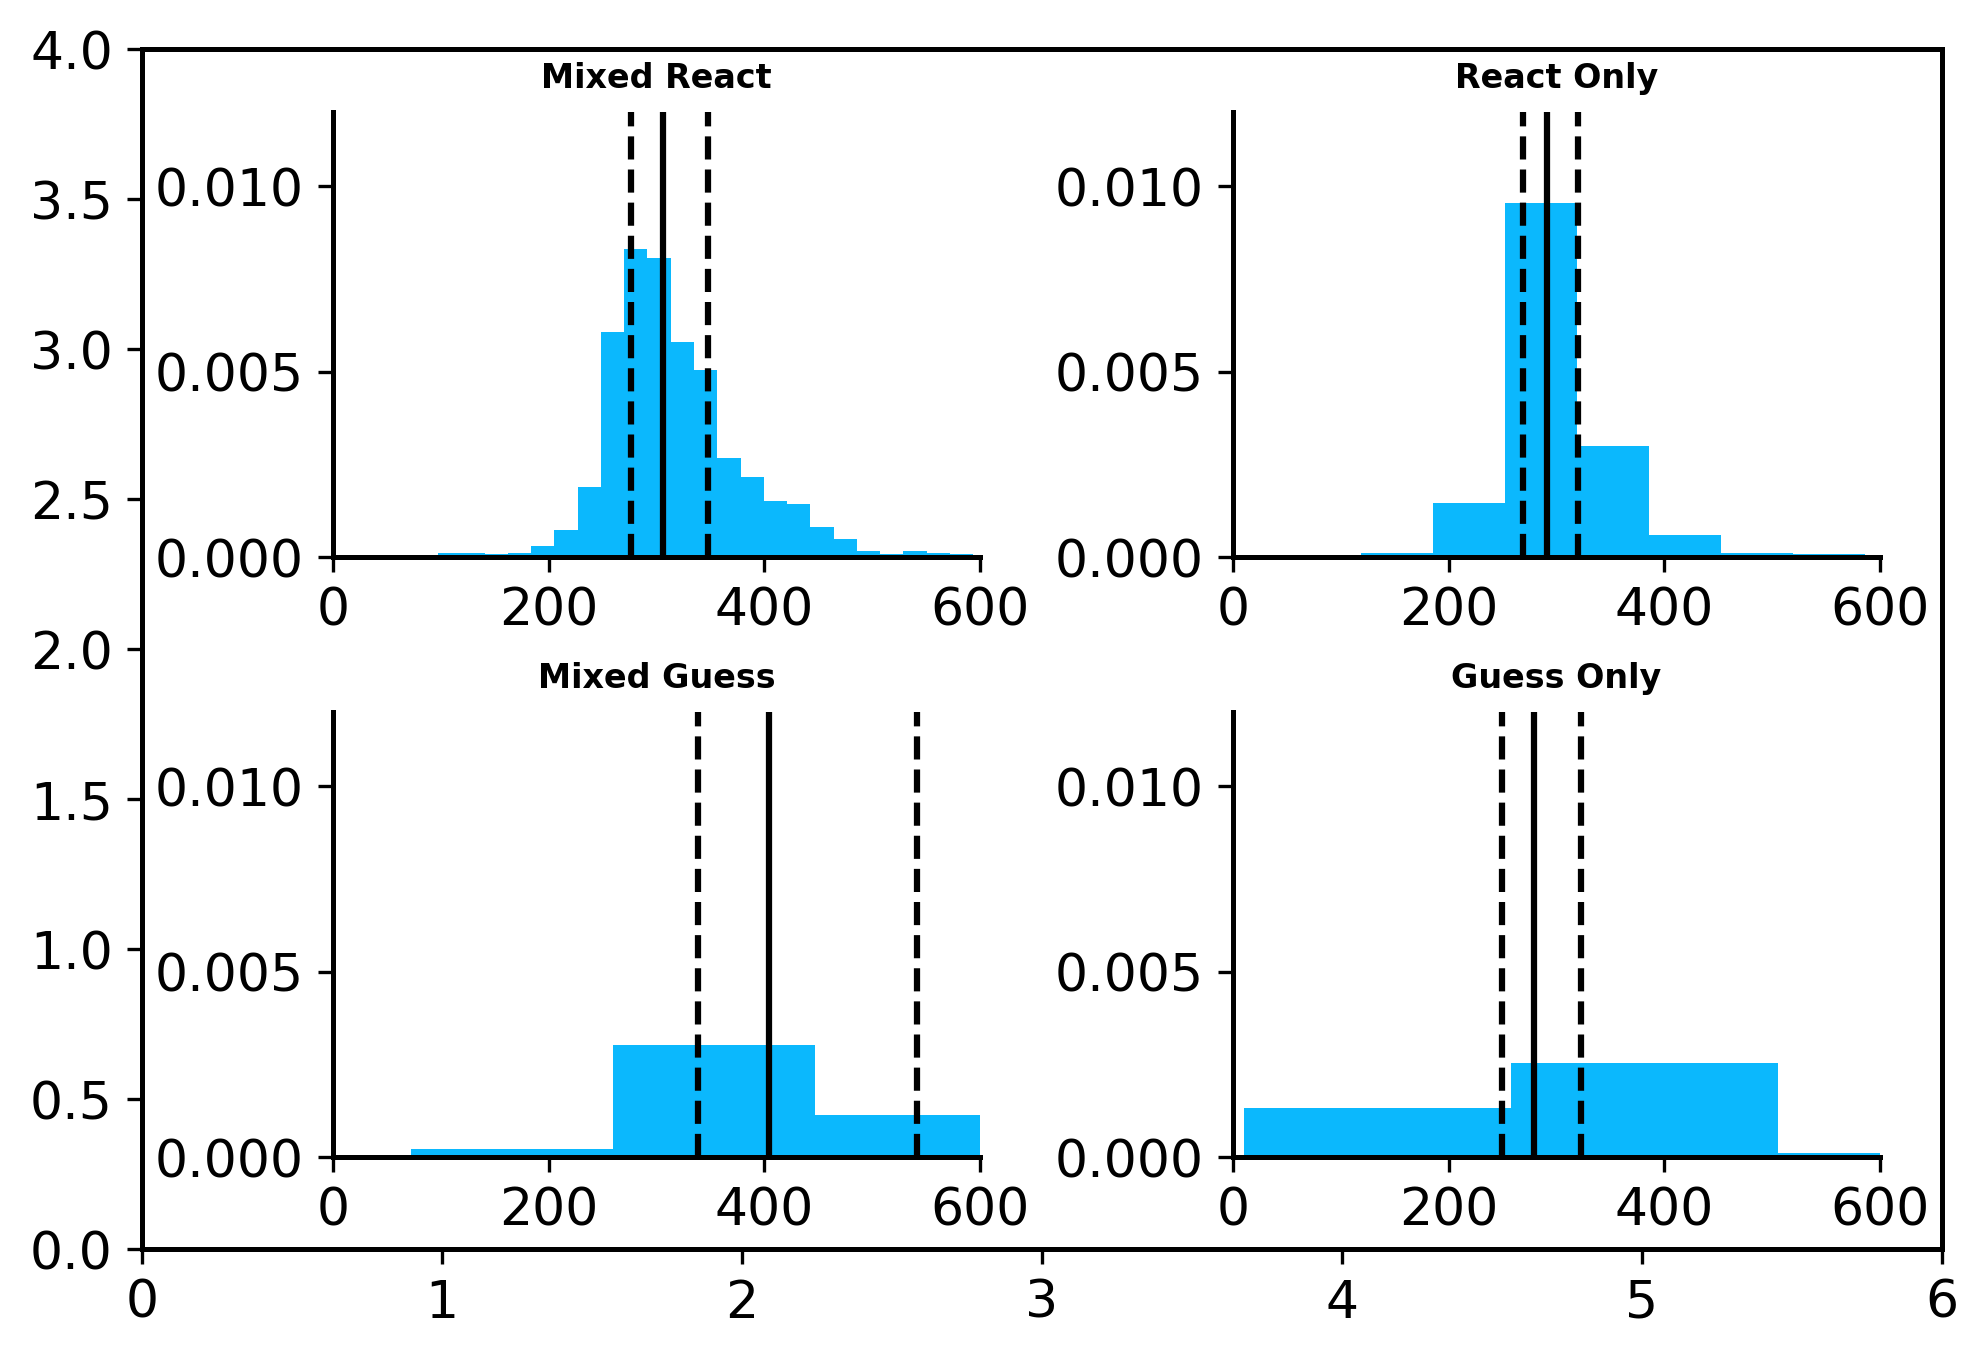

In [17]:
fig = pf.NewFigure("ab;cd",figsize = (6,4), dpi = 300)
ax1,ax2,ax3,ax4 = fig.axes.values()
filters = [["mixed","react"],
           ["react_only","react"],
           ['mixed',"guess"],
           ['guess_only','guess']]
titles = ["Mixed React", "React Only", "Mixed Guess", "Guess Only"]
for i,ax in enumerate(fig.axes.values()):
    condition = filters[i][0]
    decision_type = filters[i][1]
    values = rawdata_df.query('condition == @condition & decision_type == @decision_type')['reaction_time'].to_numpy()
    ax.hist(values, density=True,bins=25)
    ax.axvline(np.nanmedian(values))
    ax.axvline(np.nanquantile(values,0.25),ls='--')
    ax.axvline(np.nanquantile(values,0.75),ls='--')
    ax.set_xlim(0,600)
    ax.set_ylim(0,0.012)
    ax.set_title(titles[i], fontsize = 8)
    

## Task Switching

In [18]:
# Get the reactions that only came after a reaction
repeat_df = pd.DataFrame(columns=rawdata_df.columns)
switch_df = pd.DataFrame(columns=rawdata_df.columns)
c1,c2 = 0,0
for index,row in rawdata_df.query("condition == 'mixed'").iterrows():
    if index == 0:
        pass
    else:
        if last_row['decision_type'] == row['decision_type']:
            repeat_df.loc[c1] = row
            c1+=1
        else:
            switch_df.loc[c2] = row
            c2+=1
    last_row = row['decision_type']

TypeError: string indices must be integers

In [ ]:
def get_metric(df:pd.DataFrame, metric:str, groupby:list,  condition:str, decision_type:str) -> np.ndarray:
        specific_condition = df.query(f"condition=='mixed' & decision_type==@decision_type").reset_index()
        groupby_median = specific_condition.groupby(groupby)[[metric]].median()
        return groupby_median.values.squeeze().astype(float)

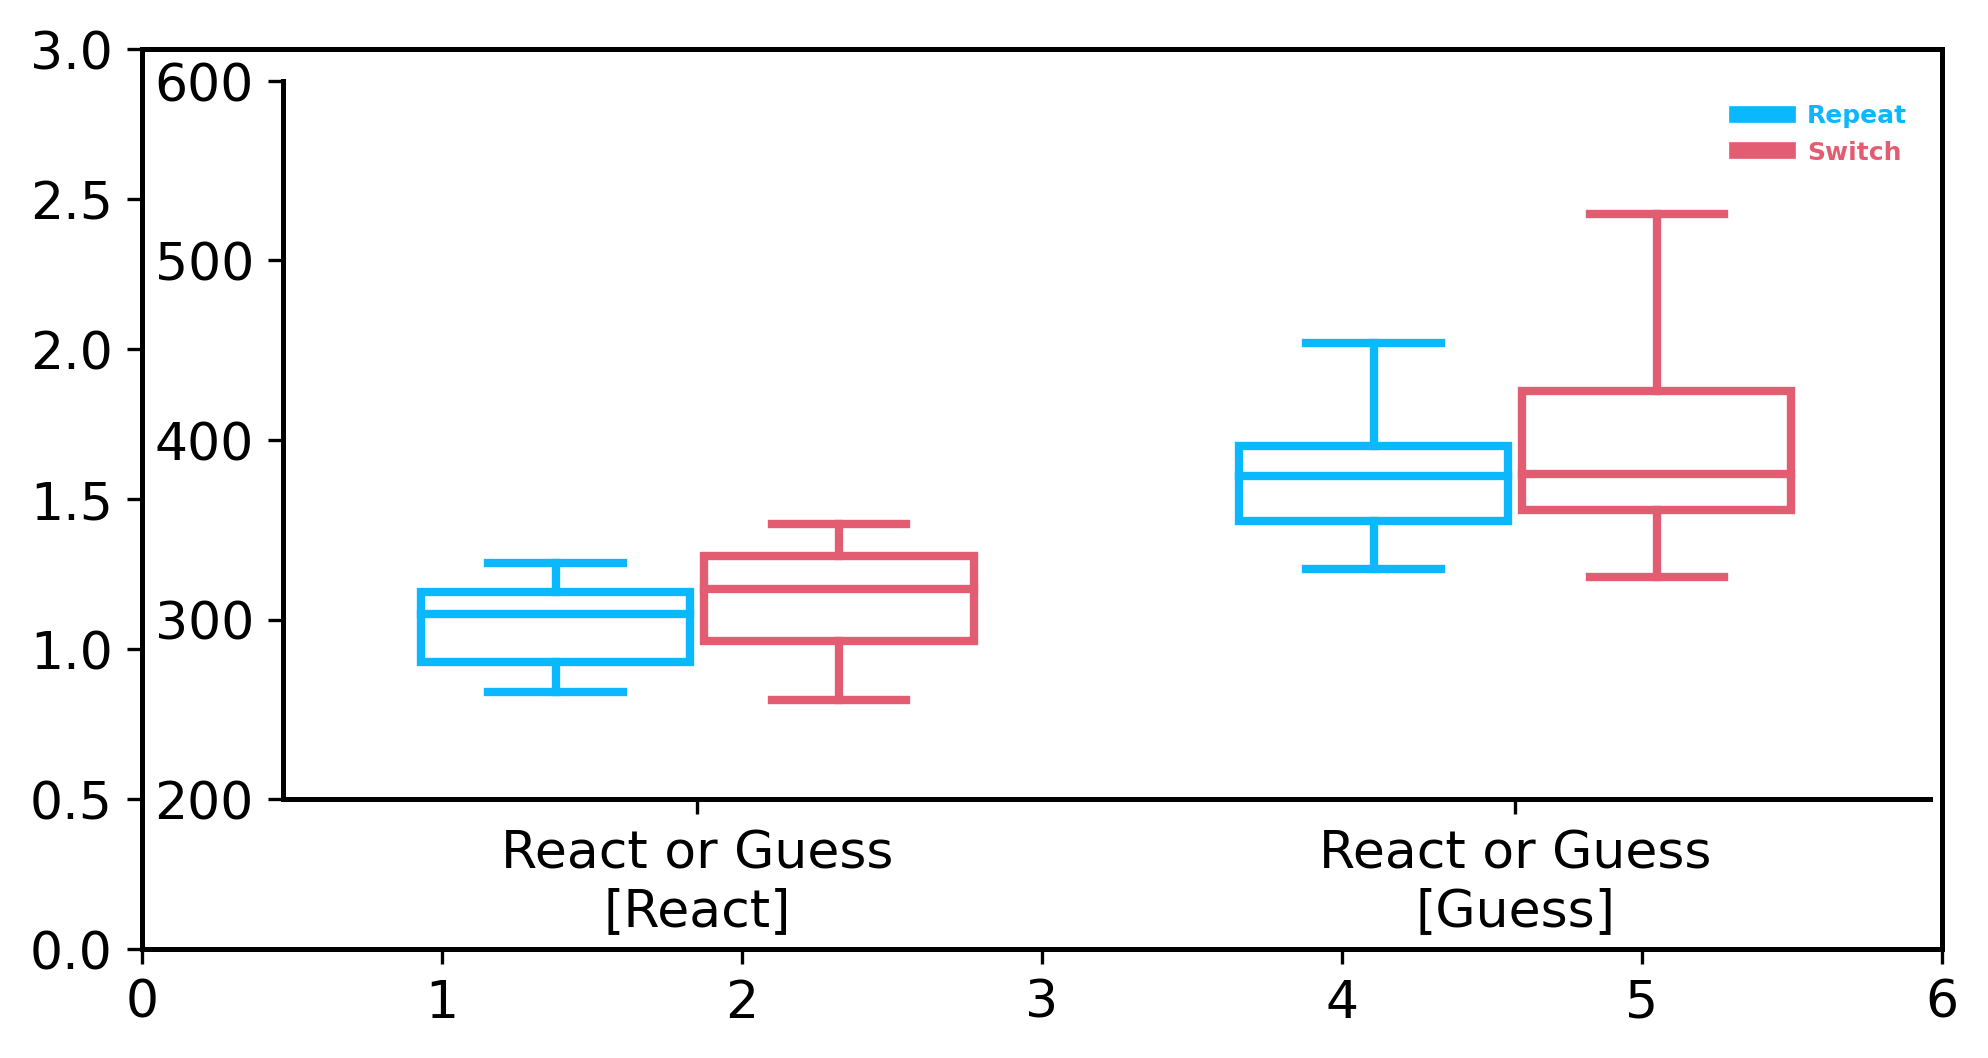

In [ ]:
metrics = [get_metric(repeat_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'react'),
           get_metric(switch_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'react'),
           get_metric(repeat_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'guess'),
           get_metric(switch_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'guess'),
]       
fig = pf.NewFigure('a',figsize=(6,3),dpi=300,)
ax = fig.axes['a']
bw = (0.1*w)/2 # box widths of all boxes combined takes up 30% of the width
xlocs = np.linspace(0,1.5,2)
pf.boxplot(ax, xlocs[0]-bw/2, data=metrics[0], box_width=bw*0.95, lw=2, color = wheel.rak_blue)
pf.boxplot(ax, xlocs[0]+bw/2, data=metrics[1], box_width=bw*0.95,lw=2, color = wheel.rak_red)
pf.boxplot(ax, xlocs[1]-bw/2, data=metrics[2], box_width=bw*0.95,lw=2, color = wheel.rak_blue)
pf.boxplot(ax, xlocs[1]+bw/2, data=metrics[3], box_width=bw*0.95,lw=2, color = wheel.rak_red)
        
ax.set_xticks(xlocs, labels = ["React or Guess\n[React]","React or Guess\n[Guess]"])
ax.set_ylim(200,600)
dv.legend(ax, labels = ['Repeat',"Switch"], colors = [wheel.rak_blue, wheel.rak_red])

In [ ]:
rawdata_df.query("subject == 1")['decision_type'].to_numpy()[:100]

array(['guess', 'react', 'guess', 'guess', 'guess', 'react', 'guess',
       'guess', 'react', 'react', 'guess', 'guess', 'react', 'guess',
       'react', 'react', 'guess', 'react', 'react', 'react', 'react',
       'react', 'guess', 'react', 'guess', 'react', 'guess', 'react',
       'react', 'react', 'react', 'react', 'react', 'guess', 'guess',
       'react', 'guess', 'react', 'guess', 'react', 'react', 'react',
       'react', 'react', 'react', 'react', 'guess', 'guess', 'react',
       'guess', 'guess', 'guess', 'guess', 'guess', 'react', 'guess',
       'react', 'guess', 'react', 'guess', 'react', 'react', 'react',
       'react', 'guess', 'guess', 'react', 'guess', 'guess', 'guess',
       'guess', 'guess', 'react', 'guess', 'guess', 'guess', 'react',
       'guess', 'guess', 'guess', 'react', 'guess', 'react', 'react',
       'guess', 'react', 'guess', 'guess', 'guess', 'guess', 'guess',
       'react', 'guess', 'react', 'react', 'react', 'react', 'guess',
       'react', 'gue